<a href="https://colab.research.google.com/github/airctic/icevision/blob/master/notebooks/getting_started_mmdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Quickstart
[MMDetection](https://github.com/open-mmlab/mmdetection)


## Introduction

This tutorial walk you through the different steps of training one of the MMDetection models supported in IceVision. We use either the Fridge Objects dataset or the PennFudan dataset. 

The IceVision Framework is an **agnostic framework**. As an illustration, we will train our model using both the [fastai](https://github.com/fastai/fastai) library, and [pytorch-lightning](https://github.com/PyTorchLightning/pytorch-lightning) libraries.

For more information about how the fridge dataset as well as its corresponding parser check out the [IceData repository](https://github.com/airctic/icedata).

## Installing IceVision and IceData

In [ ]:
# !pip install icevision[all] icedata -q
!pip install git+git://github.com/airctic/icevision.git#egg=icevision[all] --upgrade -q

In [ ]:
# !pip install icedata -q
!pip install git+git://github.com/airctic/icedata.git --upgrade -q

## MMDetection Installation

In [ ]:
# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git

!pip install -e mmdetection -q

In [ ]:
!ls

mmdetection  sample_data


## Check Pytorch installation

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


In [ ]:
torch_version = torch.__version__
cuda_version = f"cu{torch.version.cuda.replace('.', '')}"
torch_version, cuda_version

('1.7.0', 'cu102')

## MMCV Full-Version Installation 

In [ ]:
mmcv_full_version = "1.2.5"
mmcv_full_url = f"https://download.openmmlab.com/mmcv/dist/{cuda_version}/torch{torch_version}/index.html" #e.g https://download.openmmlab.com/mmcv/dist/cu101/torch1.7.0/index.html 
mmcv_full_url

'https://download.openmmlab.com/mmcv/dist/cu102/torch1.7.0/index.html'

In [ ]:
!pip install mmcv-full=={mmcv_full_version} -f {mmcv_full_url} -U -q

In [ ]:
# Restart Runtime
import os

def restart_runtime():
  os.kill(os.getpid(), 9)

restart_runtime()

In [ ]:
import mmcv
print("MMCV: ", mmcv.__version__)

MMCV:  1.2.5


In [ ]:
# Check MMDetection installation
import mmdet
print("MMDetection: ", mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

MMDetection:  2.10.0
10.2
GCC 7.3


## If mmdet is not recognized, Restart Runtime from the "Runtime Menu" 

## Imports

In [ ]:
from icevision.all import *

## MMDetection Models Information

models_info contain all the necessary configuration information to build an MMDetection model. That includes:

- 'model_name'
- 'model_type'
- 'cfg_filepath'
- 'weights_url'

In [ ]:
from icevision.models.mmdet.models import sparse_rcnn

In [ ]:
all_models_info = [
          {
            'model_name': "sparse_rcnn",
            'model_type': sparse_rcnn,
            'cfg_filepath': "mmdetection/configs/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco.py",
            'weights_url': "https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth",
          },
          {
            'model_name': "retinanet",
            'model_type': models.mmdet.retinanet,
            'cfg_filepath': "mmdetection/configs/_base_/models/retinanet_r50_fpn.py",
            'weights_url': "http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth",
          },
          {
            'model_name': "fcos",
            'model_type': models.mmdet.fcos,
            'cfg_filepath': "mmdetection/configs/fcos/fcos_x101_64x4d_fpn_gn-head_mstrain_640-800_2x_coco.py",
            'weights_url': "http://download.openmmlab.com/mmdetection/v2.0/fcos/fcos_x101_64x4d_fpn_gn-head_mstrain_640-800_4x2_2x_coco/fcos_x101_64x4d_fpn_gn-head_mstrain_640-800_4x2_2x_coco_20200229-11f8c079.pth",
          },
          {
            'model_name': "faster_rcnn",
            'model_type': models.mmdet.faster_rcnn,
            'cfg_filepath': "mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py",
            'weights_url': "http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth",
          },
          {
            'model_name': "mask_rcnn",
            'model_type': models.mmdet.mask_rcnn,
            'cfg_filepath': "mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py",
            'weights_url': "http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth",
          },
        ]

## Select a Model to train

You can select one of the following models: "retinanet", "fcos", "faster_rcnn", "mask_rcnn"

In [ ]:
model_name = "sparse_rcnn"  # "sparse_rcnn" , "retinanet", "fcos", "faster_rcnn", "mask_rcnn"

In [ ]:
model_info = next(m_info for m_info in all_models_info if m_info["model_name"] == model_name)
model_info

{'cfg_filepath': 'mmdetection/configs/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco.py',
 'model_name': 'sparse_rcnn',
 'model_type': <module 'icevision.models.mmdet.models.sparse_rcnn' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/sparse_rcnn/__init__.py'>,
 'weights_url': 'https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth'}

In [ ]:
model_type = model_info["model_type"]
cfg_filepath = model_info["cfg_filepath"]
weights_url = model_info["weights_url"]

## Datasets :

- For Object Detection the Fridge Object Dataset will be used
- For Mask Detection the PennFudan Dataset will be used



In [ ]:
if "mask" in model_name:
  data_dir = icedata.pennfudan.load_data()
  parser = icedata.pennfudan.parser(data_dir)
else:
  data_dir = icedata.fridge.load_data()
  parser = icedata.fridge.parser(data_dir)

In [ ]:
train_records, valid_records = parser.parse()

  0%|          | 0/128 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:134


In [ ]:
train_records[0]

BaseRecord

common: 
	- Image size ImgSize(width=499, height=666)
	- Image ID: 108
	- Filepath: /root/.icevision/data/fridge/odFridgeObjects/images/81.jpg
	- Image: None
detection: 
	- BBoxes: [<BBox (xmin:24, ymin:336, xmax:128, ymax:501)>, <BBox (xmin:106, ymin:244, xmax:205, ymax:502)>, <BBox (xmin:265, ymin:268, xmax:353, ymax:492)>, <BBox (xmin:340, ymin:217, xmax:486, ymax:509)>]
	- Labels: [3, 4, 1, 2]

In [ ]:
presize, size = 512, 384

train_tfms = tfms.A.Adapter(
    [*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()]
)
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])

In [ ]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [ ]:
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

In [ ]:
parser.class_map

<ClassMap: {'background': 0, 'milk_bottle': 1, 'carton': 2, 'can': 3, 'water_bottle': 4}>

### Visualization
Showing some images

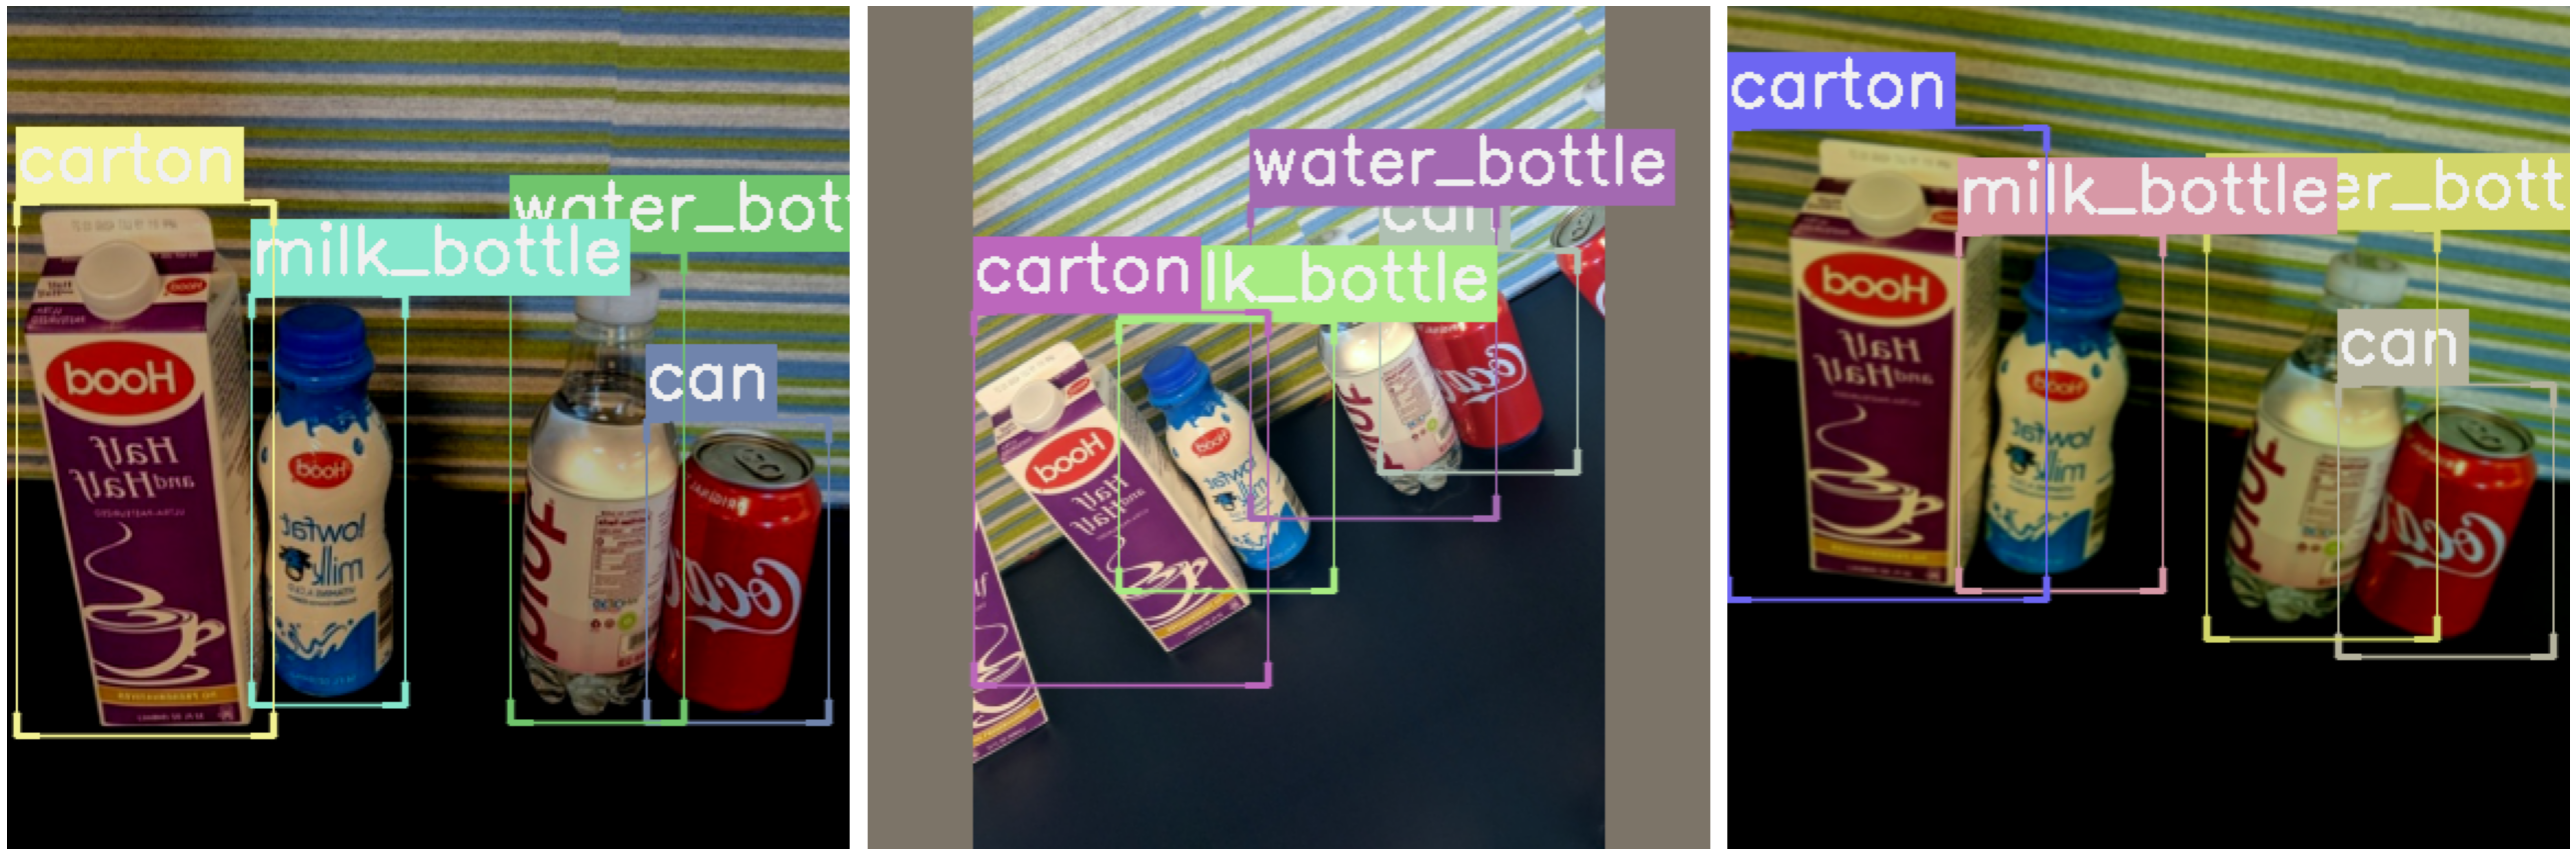

In [ ]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3, class_map=parser.class_map)

## Downloading Pretrained Weights

In [ ]:
weights_url

'https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth'

In [ ]:
checkpoints_dir = "checkpoints"

In [ ]:
!mkdir {checkpoints_dir}
!wget -c -P checkpoints/ {weights_url}

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-03-16 02:21:30--  https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 425491652 (406M) [application/octet-stream]
Saving to: ‘checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth’

sparse_rcnn_r50_fpn 100%[===================>] 405.78M  8.49MB/s    in 50s     

2021-03-16 02:22:21 (8.14 MB/s) - ‘checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth’ saved [425491652/425491652]



In [ ]:
!ls {checkpoints_dir}

faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth


## MMDetection Configuration File

### Updating the Model Config File

> Note: You don't need to change the default config. Here, we are only showing how to change any default value stored in the config file. As an example, we are showing how to update the loss_weight(s) 

The original config files use the default `loss_weight=1`.



In [ ]:
# Get the weights_path
weights_fname = Path(weights_url).name
weights_path = f"{checkpoints_dir}/{weights_fname}"
weights_path

'checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth'

In [ ]:
cfg_filepath

'mmdetection/configs/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco.py'

In [ ]:
from mmcv import Config

cfg = Config.fromfile(cfg_filepath)

In [ ]:
# cfg.model.bbox_head

### Default `loss_weigt`(s) = 1

In [ ]:
# cfg.model.bbox_head.loss_cls, cfg.model.bbox_head.loss_bbox

## Updating Model Config attributes

> Note: We can update any attributes defined in the python file where those attributes are populated

In this example, we are updating the `loss_weigt`(s) with the following values


In [ ]:
# cfg.model.bbox_head.loss_cls.loss_weight = 0.8
# cfg.model.bbox_head.loss_bbox.loss_weight = 2

In [ ]:
# cfg.model.bbox_head.loss_cls, cfg.model.bbox_head.loss_bbox

## Creating a Model

In [ ]:
weights_path

'checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth'

In [ ]:
model = model_type.model(cfg, num_classes=len(parser.class_map), weights_path=weights_path)

## Training

## Training - Fastai

In [ ]:
# Fastai trainable_params splitter
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, splitter=fastai.trainable_params)


# Using param_groups (model splitter)
# - 6 groups for OneStageDetector model (fcos, retinanet)
# - 7 groups for TwoStageDetector model (faster_rcnn, mask_rcnn, sparse_rcnn)

#learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model)


SuggestedLRs(lr_min=5.743491929024458e-05, lr_steep=2.7762873287429102e-05)

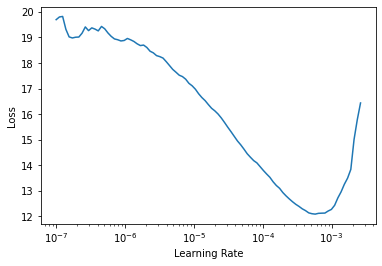

In [ ]:
# learn.lr_find()

# For Sparse-RCNN, use lower `end_lr`
learn.lr_find(end_lr=0.005)

In [ ]:
learn.fine_tune(20, 1e-4)

epoch,train_loss,valid_loss,time
0,14.337517,7.669372,00:12


epoch,train_loss,valid_loss,time
0,7.920472,6.773910,00:12
1,7.567161,5.528913,00:11
2,7.176954,5.033876,00:11
3,6.767615,4.331245,00:12
4,6.582040,4.292982,00:12
5,6.212620,4.376982,00:12
6,5.984905,4.201395,00:12
7,5.679830,3.673456,00:12
8,5.609166,4.486051,00:12
9,5.494377,3.776752,00:12


## Training - Pytorch-Lightning

In [ ]:
class LitModel(model_type.lightning.ModelAdapter):
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=1e-5)
    
lit_model = LitModel(model)
trainer = pl.Trainer(max_epochs=10, gpus=1, num_sanity_val_steps=0, check_val_every_n_epoch=1)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [ ]:
lr_finder = trainer.tuner.lr_find(lit_model, train_dl, valid_dl, max_lr=0.005)

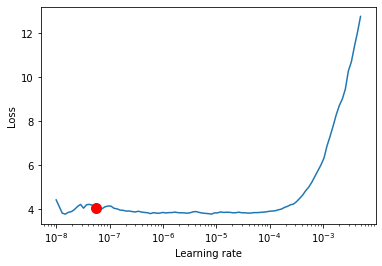

In [ ]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [ ]:
trainer.fit(lit_model, train_dl, valid_dl)

## Show Results

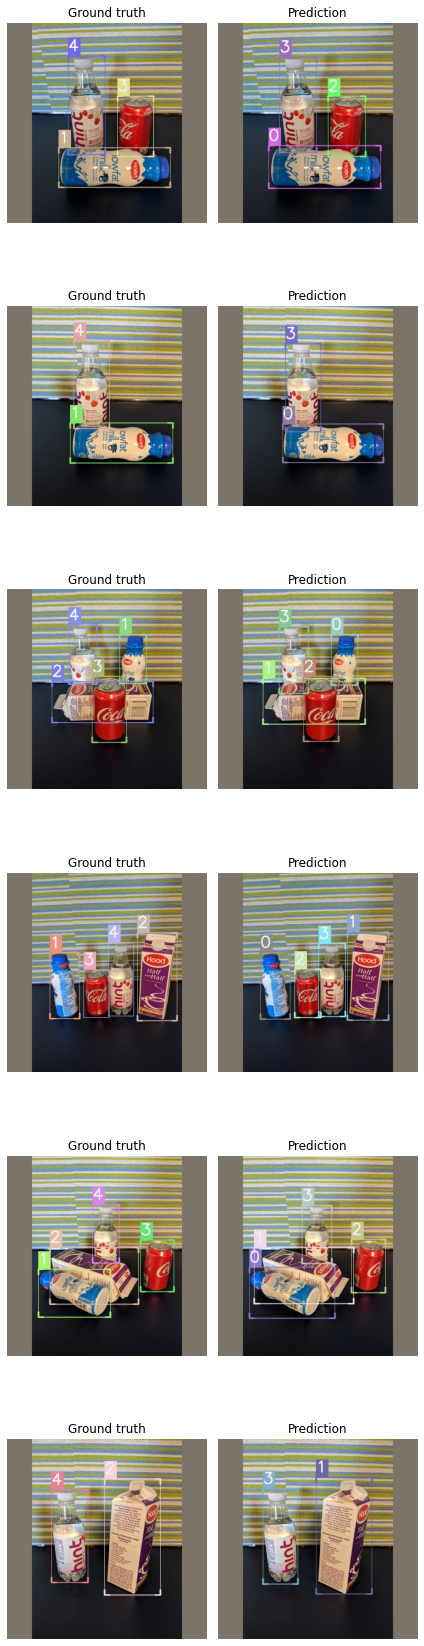

In [ ]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

## Inference


In [ ]:
preds = model_type.predict(model, valid_ds)

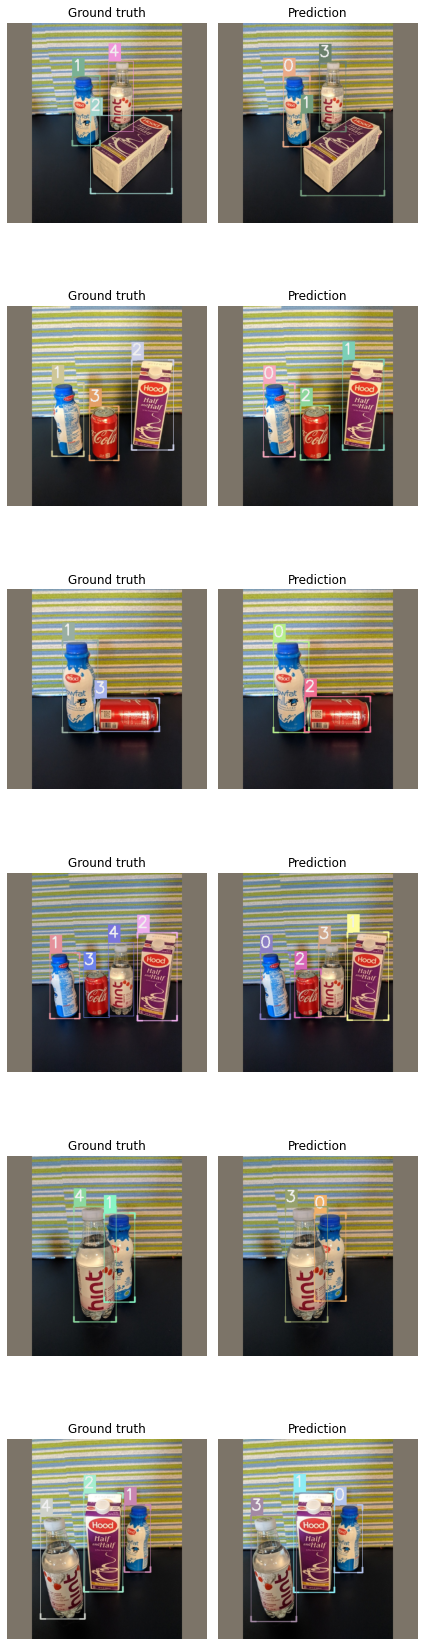

In [ ]:
show_preds(
    preds=preds[:6],
    denormalize_fn=denormalize_imagenet,
    ncols=3,
)

## Happy Learning!

If you need any assistance, feel free to join our [forum](https://discord.gg/JDBeZYK).